In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

In [2]:
sens_50 = pd.read_csv("../summary_data/sensitivity.50.csv", header=0)
ppv_50 = pd.read_csv("../summary_data/ppv.50.csv", header=0)
sens_75 = pd.read_csv("../summary_data/sensitivity.75.csv", header=0)
ppv_75 = pd.read_csv("../summary_data/ppv.75.csv", header=0)
sens_100 = pd.read_csv("../summary_data/sensitivity.100.csv", header=0)
ppv_100 = pd.read_csv("../summary_data/ppv.100.csv", header=0)
ppv_100

,tool,1,2,4,8,16,32,64,128
0,imrep,0.88,0.88,0.85,0.84,0.82,0.67,0.56,0.34
1,mixcr,0.32,0.26,0.18,0.11,0.08,0.06,0.04,0.02
2,imseq,0.41,0.28,0.19,0.11,0.07,0.04,0.03,0.02
3,igblast,0.45,0.37,0.26,0.16,0.10,0.06,0.04,0.02


In [3]:
sens_50['Measure'] = "Recall"
sens_50['Read Length'] = 50
sens_75['Measure'] = "Recall"
sens_75['Read Length'] = 75
sens_100['Measure'] = "Recall"
sens_100['Read Length'] = 100
ppv_50['Measure'] = "Precision"
ppv_50['Read Length'] = 50
ppv_75['Measure'] = "Precision"
ppv_75['Read Length'] = 75
ppv_100['Measure'] = "Precision"
ppv_100['Read Length'] = 100

eval_df = pd.concat([sens_50, sens_75, sens_100, ppv_50, ppv_75, ppv_100], ignore_index = True)
eval_df.head()

,tool,1,2,4,8,16,32,64,128,Measure,Read Length
0,imrep,0.13,0.17,0.20,0.25,0.20,0.27,0.20,0.17,Recall,50
1,mixcr,0.01,0.01,0.01,0.01,0.01,0.00,0.02,0.00,Recall,50
2,imseq,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Recall,50
3,igblast,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,Recall,50
4,imrep,0.54,0.64,0.64,0.62,0.61,0.64,0.64,0.61,Recall,75


In [4]:
tools = ['imrep', 'mixcr', 'imseq', 'igblast']
lengths = [50, 75, 100]
coverages = ['1', '2', '4', '8', '16', '32', '64', '128']

for l in lengths:
    for t in tools:
        row = [t]
        for c in coverages:
            tmp = eval_df.loc[eval_df['tool'] == t, :]
            tmp = tmp.loc[tmp['Read Length'] == l, :]
            p = tmp.loc[tmp['Measure'] == 'Precision', c].values[0]
            r = tmp.loc[tmp['Measure'] == 'Recall', c].values[0]
            if p == 0 and r == 0:
                fscore = 0.0
            else:
                fscore = (2*p*r)/(p+r)
            row.append(fscore)
        row.append('F1-Score')
        row.append(l)
        row_series = pd.Series(row, index = eval_df.columns)
        eval_df = eval_df.append(row_series, ignore_index=True)
eval_df.to_csv(path_or_buf='../summary_data/fig2a.csv')
eval_df.head()

,tool,1,2,4,8,16,32,64,128,Measure,Read Length
0,imrep,0.13,0.17,0.20,0.25,0.20,0.27,0.20,0.17,Recall,50
1,mixcr,0.01,0.01,0.01,0.01,0.01,0.00,0.02,0.00,Recall,50
2,imseq,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Recall,50
3,igblast,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,Recall,50
4,imrep,0.54,0.64,0.64,0.62,0.61,0.64,0.64,0.61,Recall,75


In [5]:
df_melt = pd.melt(eval_df, id_vars = ['tool', 'Measure', 'Read Length'], 
                  value_vars = ['1', '2', '4', '8', '16', '32', '64', '128'], 
                  var_name = 'Coverage', value_name = 'Value')
df_melt.columns = ["Tool", "Measure", "Read length", "Coverage", "Value"]
df_melt.head()

,Tool,Measure,Read length,Coverage,Value
0,imrep,Recall,50,1,0.13
1,mixcr,Recall,50,1,0.01
2,imseq,Recall,50,1,0.00
3,igblast,Recall,50,1,0.00
4,imrep,Recall,75,1,0.54


In [6]:
colors = ['#F7941D', '#00b9f2', '#00a875', '#ecde38']
sns.set_palette(sns.color_palette(colors))

# Figure 2A

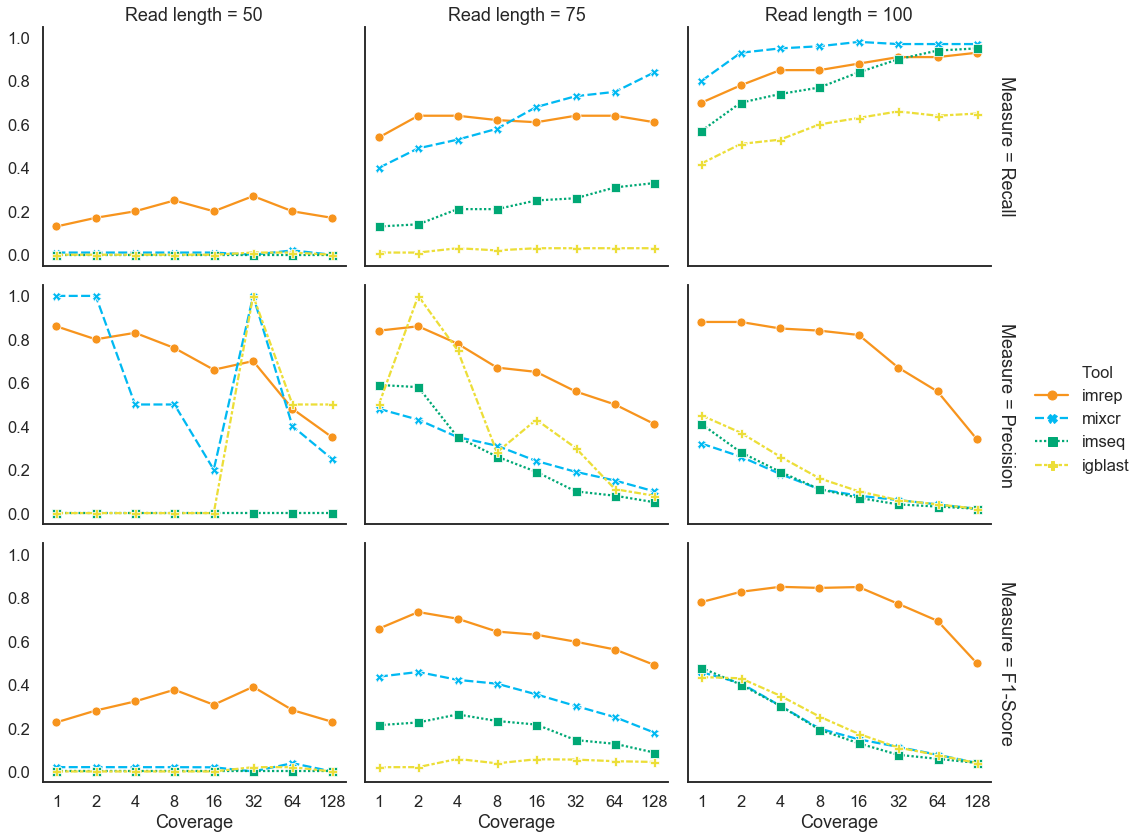

In [7]:
sns.set_style('white')
sns.set_context('talk')

g = sns.FacetGrid(df_melt, row = 'Measure', col = 'Read length', height = 4, aspect = 1.25, margin_titles = True)
g = (g.map(sns.lineplot, 'Coverage', 'Value', hue = 'Tool', style = 'Tool', markers = True,
         sort=False, err_style=None, data = df_melt).add_legend())
for ax in g.axes.flat:
    ax.set_ylabel('')
    
plt.savefig('../figures/Figure2_a.png')
plt.savefig('../figures/Figure2_a.pdf')

In [8]:
data_portion2=pd.read_csv("../summary_data/portion.captured.frequency.csv")
data_portion2.tail()

,th,imrep_portion_frequency,mixcr_portion_frequency
1995,0.00020,0.534770,0.402387
1996,0.00015,0.534386,0.402080
1997,0.00010,0.534216,0.401952
1998,0.00005,0.533276,0.401246
1999,0.00000,0.532692,0.400805


# Figure 2b

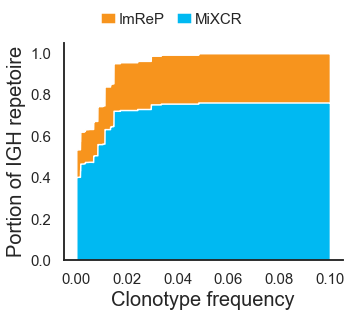

In [9]:
fig, ax = plt.subplots(figsize=(5, 4))


ax.stackplot(data_portion2['th'], data_portion2['imrep_portion_frequency'],labels=["ImReP"])
ax.stackplot(data_portion2['th'], data_portion2['mixcr_portion_frequency'],labels=["MiXCR"])

#ax.invert_xaxis()

plt.legend(bbox_to_anchor=(0.69,1.2), frameon=False, ncol=2, handletextpad=0.2, columnspacing=0.8, handlelength=1, prop={'size': 15})


ax.set_ylabel('Portion of IGH repetoire', fontsize='large')   # relative to plt.rcParams['font.size']
ax.set_xlabel('Clonotype frequency', fontsize='large')   # relative to plt.rcParams['font.size']


locs, labels = plt.xticks()

#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)



# setting label sizes after creation
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

# We change the fontsize of minor ticks label 
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

sns.despine()
plt.savefig("../figures/Figure2_b.pdf", bbox_inches='tight')
plt.savefig("../figures/Figure2_b.png", bbox_inches='tight')

In [10]:
bigdata_imrep = pd.read_csv('../summary_data/imrep_data.csv')
bigdata_mixcr = pd.read_csv('../summary_data/mixcr_data.csv')

# Figure 2c

(0.9720194468069538, 4.398728144450256e-40)
63


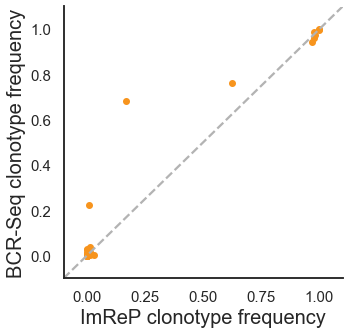

In [11]:
mean, cov = [0, 0], [(1, .6), (.6, 1)]
x, y = np.random.multivariate_normal(mean, cov, 100).T
y += x + 1

f, ax = plt.subplots(figsize=(5, 5))

ax.scatter(x="FREQ", y="FREQ.imrep", data=bigdata_imrep, c=colors[0], s=30)
ax.set(xlim=(-0.1, 1.1), ylim=(-0.1, 1.1))




# Plot your initial diagonal line based on the starting
# xlims and ylims.
diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".7")

def on_change(axes):
    # When this function is called it checks the current
    # values of xlim and ylim and modifies diag_line
    # accordingly.
    x_lims = ax.get_xlim()
    y_lims = ax.get_ylim()
    diag_line.set_data(x_lims, y_lims)

# Connect two callbacks to your axis instance.
# These will call the function "on_change" whenever
# xlim or ylim is changed.
ax.callbacks.connect('xlim_changed', on_change)
ax.callbacks.connect('ylim_changed', on_change)

ax.set_ylabel('BCR-Seq clonotype frequency', fontsize='large')   # relative to plt.rcParams['font.size']
ax.set_xlabel('ImReP clonotype frequency', fontsize='large')   # relative to plt.rcParams['font.size']




# setting label sizes after creation
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# We change the fontsize of minor ticks label 
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

plt.savefig("../figures/Figure2_c_0.pdf", bbox_inches='tight')
plt.savefig("../figures/Figure2_c_0.png", bbox_inches='tight')

print(stats.pearsonr(bigdata_imrep['FREQ'], bigdata_imrep['FREQ.imrep']))
print(len(bigdata_imrep['FREQ.imrep']))

(0.8733532567497009, 5.077285964351194e-15)
45


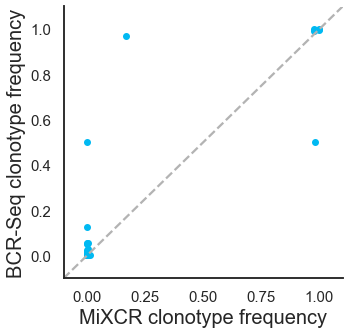

In [18]:
f, ax = plt.subplots(figsize=(5, 5))

ax.scatter(x="FREQ", y="FREQ.mixcr", data=bigdata_mixcr, c=colors[1], s=30)
ax.set(xlim=(-0.1, 1.1), ylim=(-0.1, 1.1))




# Plot your initial diagonal line based on the starting
# xlims and ylims.
diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".7")

def on_change(axes):
    # When this function is called it checks the current
    # values of xlim and ylim and modifies diag_line
    # accordingly.
    x_lims = ax.get_xlim()
    y_lims = ax.get_ylim()
    diag_line.set_data(x_lims, y_lims)

# Connect two callbacks to your axis instance.
# These will call the function "on_change" whenever
# xlim or ylim is changed.
ax.callbacks.connect('xlim_changed', on_change)
ax.callbacks.connect('ylim_changed', on_change)


ax.set_ylabel('BCR-Seq clonotype frequency', fontsize='large')   # relative to plt.rcParams['font.size']
ax.set_xlabel('MiXCR clonotype frequency', fontsize='large')   # relative to plt.rcParams['font.size']




# setting label sizes after creation
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# We change the fontsize of minor ticks label 
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

#plt.savefig("correlation.mixcr.pdf", bbox_inches='tight')

plt.savefig("../figures/Figure2_c_1.pdf", bbox_inches='tight')
plt.savefig("../figures/Figure2_c_1.png", bbox_inches='tight')

print(stats.pearsonr(bigdata_mixcr['FREQ'], bigdata_mixcr['FREQ.mixcr']))
print(len(bigdata_mixcr['FREQ.mixcr']))

In [13]:
data_portion=pd.read_csv("../summary_data/BCR.Seq.validation.csv")
major_imrep = 0
major_mixcr = 0
minor_imrep = 0
minor_mixcr = 0

for i in range(len(data_portion)):
    if data_portion.iloc[i, 4] == data_portion.iloc[i, 7]:
        major_imrep += 1
    if data_portion.iloc[i, 4] == data_portion.iloc[i, 10]:
        major_mixcr += 1
    if data_portion.iloc[i, 5] == data_portion.iloc[i, 8]:
        minor_imrep += 1
    if data_portion.iloc[i, 5] == data_portion.iloc[i, 11]:
        minor_mixcr += 1

max_imrep_prop = major_imrep/len(data_portion)
max_mixcr_prop = major_mixcr/len(data_portion)
min_imrep_prop = minor_imrep/len(data_portion)
min_mixcr_prop = minor_mixcr/len(data_portion)
bar_df = pd.DataFrame({'tool': ['ImReP', 'MiXCR', 'ImReP', 'MiXCR'], 
                       'clonotype': ['Major clonotype', 'Major clonotype', 'Minor clonotype', 'Minor clonotype'], 
                       'proportion': [max_imrep_prop, max_mixcr_prop, min_imrep_prop, min_mixcr_prop]})

bar_df

,tool,clonotype,proportion
0,ImReP,Major clonotype,0.846154
1,MiXCR,Major clonotype,0.538462
2,ImReP,Minor clonotype,0.384615
3,MiXCR,Minor clonotype,0.307692


# Figure 2d

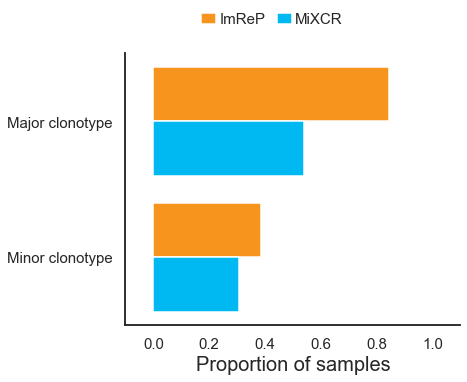

In [14]:
f, ax = plt.subplots(figsize=(6, 5))

ax.set(xlim=(-0.1, 1.1))
sns.barplot(y = 'clonotype', x = 'proportion', hue = 'tool', data = bar_df, saturation=1)

ax.set_ylabel(None, fontsize='large')   # relative to plt.rcParams['font.size']
ax.set_xlabel('Proportion of samples', fontsize='large')   # relative to plt.rcParams['font.size']

plt.legend(bbox_to_anchor=(0.69,1.2), frameon=False, ncol=2, handletextpad=0.2, columnspacing=0.8, 
           handlelength=1, prop={'size': 15})


# setting label sizes after creation
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# We change the fontsize of minor ticks label 
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

plt.savefig("../figures/Figure2_d.pdf", bbox_inches='tight')
plt.savefig("../figures/Figure2_d.png", bbox_inches='tight')

In [15]:
fig2e_df = pd.read_csv('../summary_data/Fig2Edata.csv')
fig2e_df.head()

,Body site,Histological type,B cell signature,T cell signature,ALLIG,ALLTCR,EXCLUDE
0,Spleen,Spleen,1.849335,1.672737,3904.093129,11.974925,X
1,Whole Blood,Blood,1.419284,1.462742,242.175697,21.444395,X
2,Cells - EBV-transformed lymphocytes,Blood,1.894225,1.424805,1088.633552,0.287601,X
3,Small Intestine - Terminal Ileum,Small Intestine,1.202332,1.082389,1031.075806,7.928039,X
4,Lung,Lung,0.927355,0.911519,336.943656,2.622623,X


# Figure 2e

(0.7683297580141346, 1.8304096570235084e-10)
48


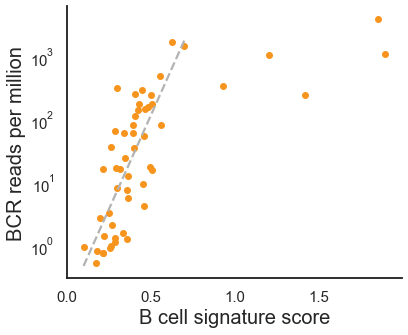

In [17]:
f, ax = plt.subplots(figsize=(6, 5))

ax.scatter(x="B cell signature", y="ALLIG", data=fig2e_df, c=colors[0], s=30)

ax.set_ylabel('BCR reads per million', fontsize='large')   # relative to plt.rcParams['font.size']
ax.set_xlabel('B cell signature score', fontsize='large')   # relative to plt.rcParams['font.size']

plt.yscale('log')

tmp = fig2e_df.loc[fig2e_df['EXCLUDE'] != 'X'].sort_values(by='B cell signature')

z = np.polyfit(tmp['B cell signature'], np.log10(tmp['ALLIG']), 1)
p = np.poly1d(z)
ax.plot(tmp['B cell signature'],10**p(tmp['B cell signature']), ls="--", c=".7")

#ax.plot(x, intercept + [slope*y for y in x], ls="--", c=".7")

# setting label sizes after creation
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# We change the fontsize of minor ticks label 
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

#plt.savefig("correlation.mixcr.pdf", bbox_inches='tight')

plt.savefig("../figures/Figure2_e.pdf", bbox_inches='tight')
plt.savefig("../figures/Figure2_e.png", bbox_inches='tight')

print(stats.pearsonr(tmp['B cell signature'], np.log10(tmp['ALLIG'])))
print(len(tmp['B cell signature']))